<a href="https://colab.research.google.com/github/kengrsls/PUBH-NHIS-Project/blob/main/Finalanalysischild22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)

# 1) Read the NHIS child file
data_raw <- read_csv("child22.csv", na = c("", "NA"))
problems(data_raw)      # show any parsing issues
names(data_raw)         # inspect the real variable names

# 2) Recode the four key analysis variables
data_recoded <- data_raw %>%
  mutate(
    ST_Therapy = case_when(
      VSLPA_C == 1 ~ "Yes",
      VSLPA_C == 2 ~ "No",
      TRUE         ~ NA_character_
    ),
    Sex = case_when(
      SEX_C == 1 ~ "Male",
      SEX_C == 2 ~ "Female",
      TRUE        ~ NA_character_
    ),
    Ethnicity = case_when(
      HISP_C == 1 ~ "Hispanic",
      HISP_C == 2 ~ "Non-Hispanic",
      TRUE        ~ NA_character_
    ),
    PovertyGroup = case_when(
      RATCAT_C %in% 1:3  ~ "Low Poverty (<1×FPL)",
      RATCAT_C %in% 4:7  ~ "Near Poverty (1–1.99×FPL)",
      RATCAT_C %in% 8:14 ~ "Higher Income (≥2×FPL)",
      TRUE               ~ NA_character_
    )
  ) %>%
  mutate(
    ST_Therapy   = factor(ST_Therapy,   levels = c("No","Yes")),
    Sex          = factor(Sex,          levels = c("Male","Female")),
    Ethnicity    = factor(Ethnicity,    levels = c("Hispanic","Non-Hispanic")),
    PovertyGroup = factor(PovertyGroup, levels = c("Low Poverty (<1×FPL)",
                                                   "Near Poverty (1–1.99×FPL)",
                                                   "Higher Income (≥2×FPL)"))
  )

# 3) Quick check of your new factors
data_recoded %>%
  select(ST_Therapy, Sex, Ethnicity, PovertyGroup) %>%
  map(~ table(.x, useNA="ifany")) %>%
  walk(print)


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 7464 Columns: 432
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): HHX
dbl (423): URBRRL, RATCAT_C, INCTCFLG_C, IMPINCFLG_C, PPSU, PSTRAT, HISPALLP...
lgl   (8): OGFLGR_C, OGHDHPR_C, OPFLG_C, CHFLG_C, MAFLG_C, PRPLCOV2_C, EQWLK...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


row,col,expected,actual,file
<int>,<int>,<chr>,<chr>,<chr>
4,400,1/0/T/F/TRUE/FALSE,2,/content/child22.csv
1686,342,1/0/T/F/TRUE/FALSE,9,/content/child22.csv
2264,399,1/0/T/F/TRUE/FALSE,2,/content/child22.csv
2264,400,1/0/T/F/TRUE/FALSE,4,/content/child22.csv
2642,342,1/0/T/F/TRUE/FALSE,2,/content/child22.csv
3507,55,1/0/T/F/TRUE/FALSE,9,/content/child22.csv
4141,342,1/0/T/F/TRUE/FALSE,2,/content/child22.csv
5006,342,1/0/T/F/TRUE/FALSE,2,/content/child22.csv
6185,55,1/0/T/F/TRUE/FALSE,2,/content/child22.csv


[1] "URBRRL"          "RATCAT_C"        "INCTCFLG_C"      "IMPINCFLG_C"    
  [5] "PPSU"            "PSTRAT"          "HISPALLP_C"      "RACEALLP_C"     
  [9] "SDQIMPTOT_C"     "SDQTOT_C"        "SDQPROS_C"       "SDQPEER_C"      
 [13] "SDQHYPE_C"       "SDQCOND_C"       "SDQEMOT_C"       "SCHDYMSSTC_C"   
 [17] "AFNOW"           "YRSINUS_C"       "CITZNSTP_C"      "HHRESPSC_FLG"   
 [21] "PCNTADTWFP_C"    "PCNTADTWKP_C"    "FDSCAT4_C"       "FDSCAT3_C"      
 [25] "RELTIVP_C"       "URGNT12MTC_C"    "EMERG12MTC_C"    "PCNT18UPTC"     
 [29] "PCNTLT18TC"      "PCNTPARNTS_C"    "PARWKFT2_C"      "PARWKFT1_C"     
 [33] "PARWORK2_C"      "PARWORK1_C"      "PARSEX2_C"       "PARSEX1_C"      
 [37] "RACPARSC_C"      "HISPPARSC_C"     "SCPARRAC_C"      "SCPARHISP_C"    
 [41] "PARAGETC2_C"     "PARAGETC1_C"     "LEGMSTAT2_C"     "LEGMSTAT1_C"    
 [45] "MARSTAT2_C"      "MARSTAT1_C"      "PARSAMEOPP_C"    "SCFAMSTR_C"     
 [49] "HIKIND01R_C"     "OGFLGR_C"        "PLN2PAY6R_C"     "PLN1PAY6R_C"    
 [53] "HIKIND09R_C"     "PLEXCHOGR_C"     "OGHDHPR_C"       "OGDEDUCR_C"     
 [57] "OGPREMR_C"       "OGXCHNGR_C"      "OTHGOVR_C"       "COVER_C"        
 [61] "EXCHANGE_C"      "NOTCOV_C"        "OPFLG_C"         "CHFLG_C"        
 [65] "MAFLG_C"         "PLNWRKR2_C"      "PLNWRKR1_C"      "RSNHIMISS_C"    
 [69] "RSNHIJOB_C"      "PRFLG_C"         "PLEXCHPR1_C"     "PRPREM1_C"      
 [73] "PXCHNG1_C"       "HICOSTR2_C"      "HICOSTR1_C"      "OTHPUB_C"       
 [77] "IHS_C"           "MILITARY_C"      "CHIP_C"          "MEDICAID_C"     
 [81] "PRIVATE_C"       "PRPLCOV1_A_C"    "PRPLCOV2_A_C"    "PLEXCHOP_C"     
 [85] "EXCHPR2_C"       "EXCHPR1_C"       "MAXPAREDUP_C"    "MAXEDUCP_C"     
 [89] "SCPARENTSC_C"    "MLTFAMFLG_C"     "OVER65FLG_C"     "PCNTADLT_C"     
 [93] "PCNTKIDS_C"      "BMICAT_C"        "WEIGHTLBTC_C"    "HEIGHTTC_C"     
 [97] "DISAB5_C"        "DISAB2_C"        "HISDETP_C"       "HISP_C"         
[101] "REGION"          "INTV_QRT"        "SRVY_YR"         "SEX_C"          
[105] "AGEP_C"          "CSTATNEW"        "HOUGVASST_C"     "HOUTENURE_C"    
[109] "HOUYRSLIV_C"     "FDSNEDAYS_C"     "FDSNOTEAT_C"     "FDSWEIGHT_C"    
[113] "FDSHUNGRY_C"     "FDSLESS_C"       "FDSSKIPDYS_C"    "FDSSKIP_C"      
[117] "FDSBALANCE_C"    "FDSLAST_C"       "FDSRUNOUT_C"     "FLUNCH12M_C"    
[121] "FWIC12M_C"       "FSNAP30D_C"      "FSNAP12M_C"      "INCOTHR_C"      
[125] "INCRETIRE_C"     "INCWELF_C"       "SSISSDIDSB_C"    "SSISSDIBTH_C"   
[129] "INCSSISSDI_C"    "INCSSRR_C"       "INCINTER_C"      "INCWRKO_C"      
[133] "NATUSBORN_C"     "MARITAL2_C"      "MARITAL1_C"      "VSLBTWR_C"      
[137] "VSLPALF_C"       "VSLPA_C"         "VSLBRAIN_C"      "VSLLGDIF_C"     
[141] "VSLLGDYS_C"      "VSLLGYR_C"       "VSLSPST_C"       "VSLSPDIF_C"     
[145] "VSLSPDYS_C"      "VSLSPYR_C"       "VSLSWDIF_C"      "VSLSWDYS_C"     
[149] "VSLSWYR_C"       "VSLVDIF_C"       "VSLVDYS_C"       "VSLVYR_C"       
[153] "YOGAHLTH_C"      "YOGAPAIN_C"      "YOGAMED_C"       "YOGABRTH_C"     
[157] "YOGA_C"          "GIPRHLTH_C"      "GIPRPAIN_C"      "GIPR_C"         
[161] "MEDIHLTH_C"      "MEDIPAIN_C"      "MEDITATE_C"      "MUSICTHPY_C"    
[165] "ARTTHPY_C"       "NATURHLTH_C"     "NATURPAIN_C"     "NATUR_C"        
[169] "MASSHLTH_C"      "MASSPAIN_C"      "MASS_C"          "ACUHLTH_C"      
[173] "ACUPAIN_C"       "ACU_C"           "CHIROHLTH_C"     "CHIROPAIN_C"    
[177] "CHIRO_C"         "SCREENTIME_C"    "WAKETIME_C"      "BEDTIME_C"      
[181] "NAPS_C"          "TIRED_C"         "OUTOFBED_C"      "RESTED_C"       
[185] "CRIME_C"         "TRAFFIC_C"       "PARKS_C"         "SIDEWALK_C"     
[189] "BIKE_C"          "WALK_C"          "STRENGTH_C"      "PADAYS_C"       
[193] "PEGYM_C"         "SPORT_C"         "TBIDRCONC_C"     "TBICHKCONC_C"   
[197] "TBIHEADSYM_C"    "TBIDAZED_C"      "TBILOSTCON_C"    "BULLYPERP_C"    
[201] "CYBERVIC_C"      "BULLYVIC_C"      "UNFAIRSO_C"      "UNFAIRRE_C"     
[205] "BNEEDS_C"        

.x
  No  Yes <NA> 
 470  270 6724 
.x
  Male Female   <NA> 
  3858   3603      3 
.x
    Hispanic Non-Hispanic 
        1967         5497 
.x
     Low Poverty (<1×FPL) Near Poverty (1–1.99×FPL)    Higher Income (≥2×FPL) 
                      896                      1475                      5093 


In [ ]:
library(tidyverse)

# 1) Read raw NHIS child file
data_raw <- read_csv("child22.csv", na = c("", "NA"))

# 2) Recode your six variables
data_recoded <- data_raw %>%
  mutate(
    # Speech therapy ever
    ST_Therapy = factor(
      case_when(
        VSLPA_C == 1 ~ "Yes",
        VSLPA_C == 2 ~ "No",
        TRUE         ~ NA_character_
      ),
      levels = c("No","Yes")
    ),

    # Sex
    Sex = factor(
      case_when(
        SEX_C == 1 ~ "Male",
        SEX_C == 2 ~ "Female",
        TRUE        ~ NA_character_
      ),
      levels = c("Male","Female")
    ),

    # Ethnicity
    Ethnicity = factor(
      case_when(
        HISP_C == 1 ~ "Hispanic",
        HISP_C == 2 ~ "Non-Hispanic",
        TRUE        ~ NA_character_
      ),
      levels = c("Hispanic","Non-Hispanic")
    ),

    # Poverty ratio group
    PovertyGroup = factor(
      case_when(
        RATCAT_C %in% 1:3   ~ "Low Poverty (<1×FPL)",
        RATCAT_C %in% 4:7   ~ "Near Poverty (1–1.99×FPL)",
        RATCAT_C %in% 8:14  ~ "Higher Income (≥2×FPL)",
        TRUE                ~ NA_character_
      ),
      levels = c("Low Poverty (<1×FPL)",
                 "Near Poverty (1–1.99×FPL)",
                 "Higher Income (≥2×FPL)")
    ),

    # Food insecurity
    FoodInsecurity = factor(
      FDSCAT3_C,
      levels = 1:4,
      labels = c("High Food Insecurity",
                 "Moderate Food Insecurity",
                 "Mild Food Insecurity",
                 "No Food Insecurity")
    ),

    # Difficulty accessing food
    FoodAccessDifficulty = factor(
      FDSCAT4_C,
      levels = 1:4,
      labels = c("Very Difficult",
                 "Somewhat Difficult",
                 "Not Very Difficult",
                 "Not At All Difficult")
    )
  )

# 3) Quick sanity‐check
data_recoded %>%
  select(ST_Therapy, Sex, Ethnicity, PovertyGroup,
         FoodInsecurity, FoodAccessDifficulty) %>%
  map(~ table(.x, useNA="ifany")) %>%
  walk(print)


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 7464 Columns: 432
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): HHX
dbl (423): URBRRL, RATCAT_C, INCTCFLG_C, IMPINCFLG_C, PPSU, PSTRAT, HISPALLP...
lgl   (8): OGFLGR_C, OGHDHPR_C, OPFLG_C, CHFLG_C, MAFLG_C, PRPLCOV2_C, EQWLK...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


.x
  No  Yes <NA> 
 470  270 6724 
.x
  Male Female   <NA> 
  3858   3603      3 
.x
    Hispanic Non-Hispanic 
        1967         5497 
.x
     Low Poverty (<1×FPL) Near Poverty (1–1.99×FPL)    Higher Income (≥2×FPL) 
                      896                      1475                      5093 
.x
    High Food Insecurity Moderate Food Insecurity     Mild Food Insecurity 
                    6624                      416                      263 
      No Food Insecurity                     <NA> 
                       0                      161 
.x
      Very Difficult   Somewhat Difficult   Not Very Difficult 
                6039                  585                  416 
Not At All Difficult                 <NA> 
                 263                  161 


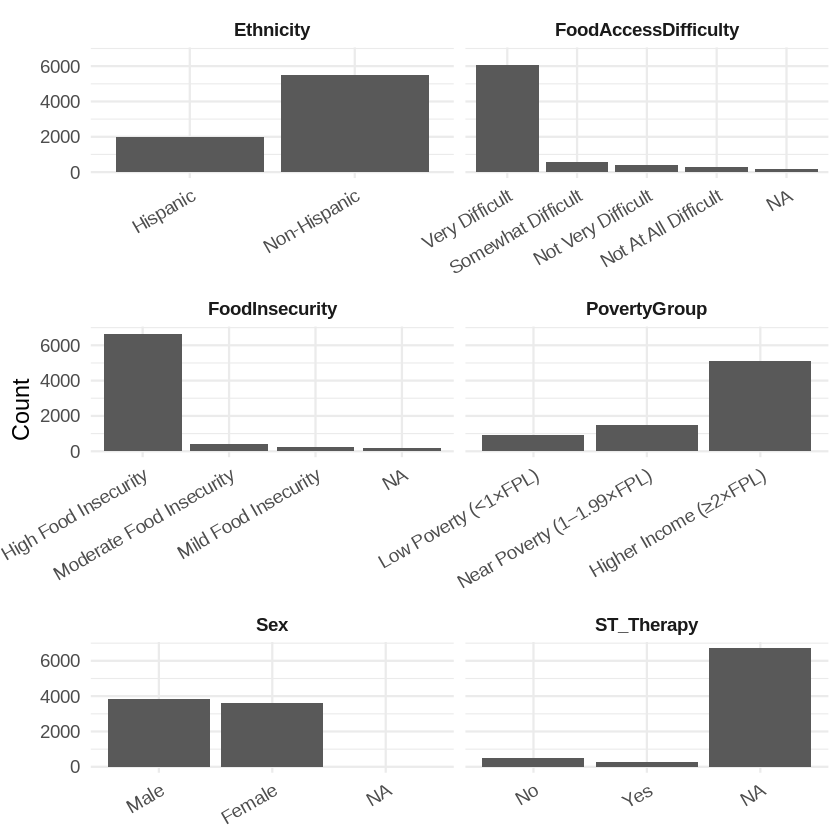

In [ ]:
library(tidyverse)

# pick the six variables you want
vars <- c("ST_Therapy",
          "Sex",
          "Ethnicity",
          "PovertyGroup",
          "FoodInsecurity",
          "FoodAccessDifficulty")

# pivot into long form
plot_df <- data_recoded %>%
  select(all_of(vars)) %>%
  pivot_longer(everything(),
               names_to  = "Variable",
               values_to = "Category")

# make a faceted bar chart
ggplot(plot_df, aes(x = Category)) +
  geom_bar() +
  facet_wrap(~ Variable, scales = "free_x", ncol = 2) +
  labs(x = NULL, y = "Count") +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 30, hjust = 1),
    strip.text   = element_text(face = "bold")
  )


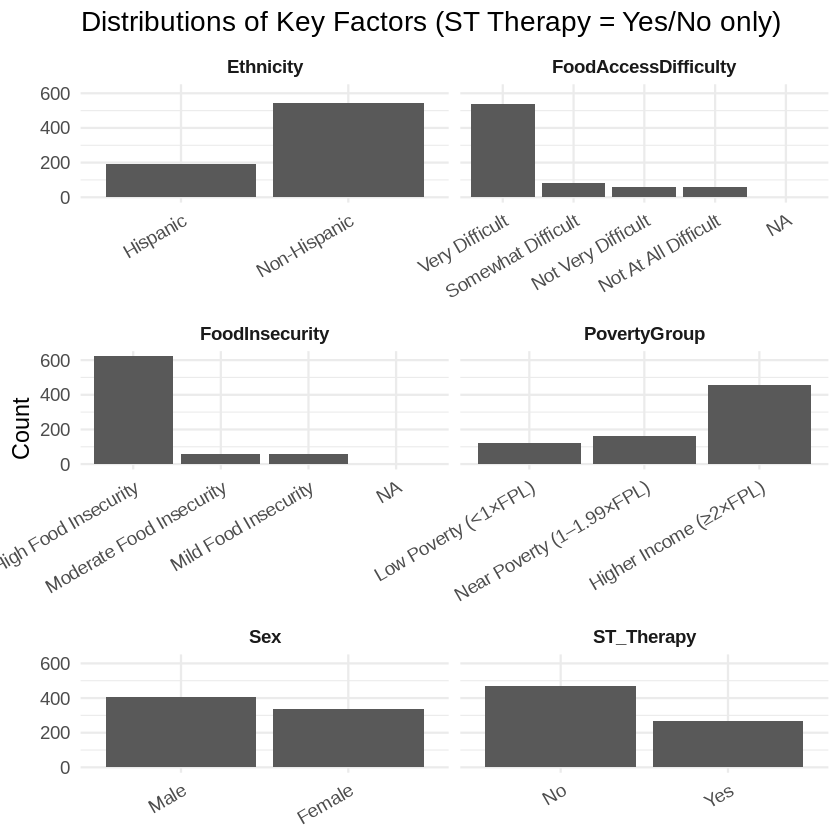

In [ ]:
library(tidyverse)

vars <- c("ST_Therapy",
          "Sex",
          "Ethnicity",
          "PovertyGroup",
          "FoodInsecurity",
          "FoodAccessDifficulty")

plot_df <- data_recoded %>%
  # keep only the Yes/No responders
  filter(ST_Therapy %in% c("Yes", "No")) %>%
  select(all_of(vars)) %>%
  pivot_longer(
    cols      = everything(),
    names_to  = "Variable",
    values_to = "Category"
  )

ggplot(plot_df, aes(x = Category)) +
  geom_bar() +
  facet_wrap(~ Variable, scales = "free_x", ncol = 2) +
  labs(x = NULL, y = "Count",
       title = "Distributions of Key Factors (ST Therapy = Yes/No only)") +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 30, hjust = 1),
    strip.text   = element_text(face = "bold")
  )


Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


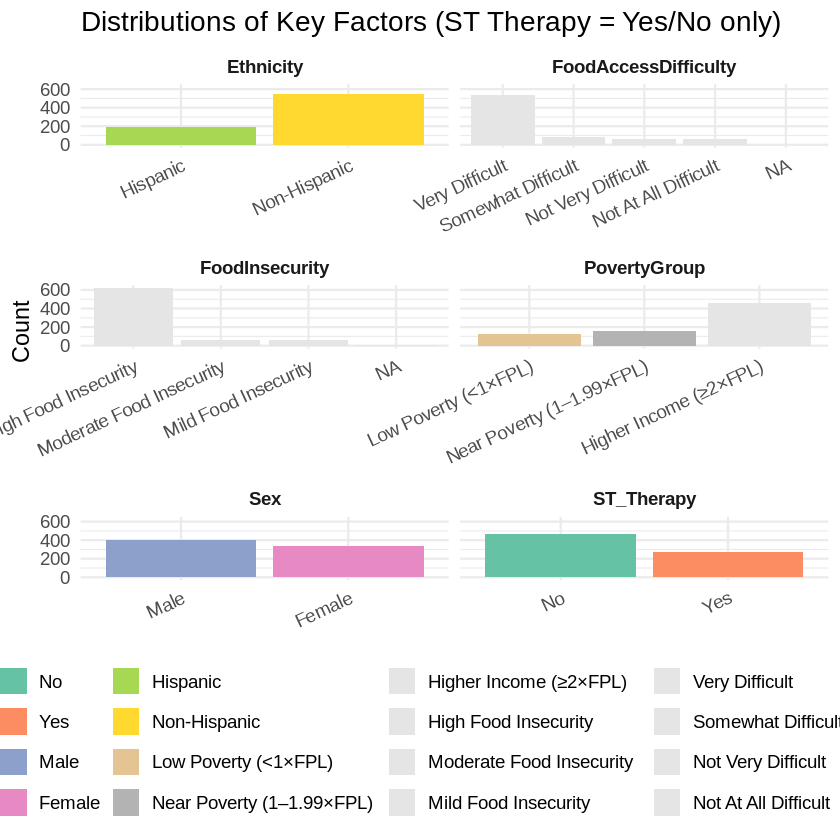

In [ ]:
library(tidyverse)
library(RColorBrewer)  # for brewer palettes, or you can use viridisLite

vars <- c("ST_Therapy",
          "Sex",
          "Ethnicity",
          "PovertyGroup",
          "FoodInsecurity",
          "FoodAccessDifficulty")

plot_df <- data_recoded %>%
  filter(ST_Therapy %in% c("Yes", "No")) %>%
  select(all_of(vars)) %>%
  pivot_longer(cols = everything(),
               names_to  = "Variable",
               values_to = "Category")

ggplot(plot_df, aes(x = Category, fill = Category)) +
  geom_bar() +
  facet_wrap(~ Variable, scales = "free_x", ncol = 2) +
  scale_fill_brewer(palette = "Set2", na.value = "grey90") +
  labs(x = NULL, y = "Count",
       title = "Distributions of Key Factors (ST Therapy = Yes/No only)",
       fill = "") +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 25, hjust = 1),
    strip.text   = element_text(face = "bold"),
    legend.position = "bottom"
  )


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


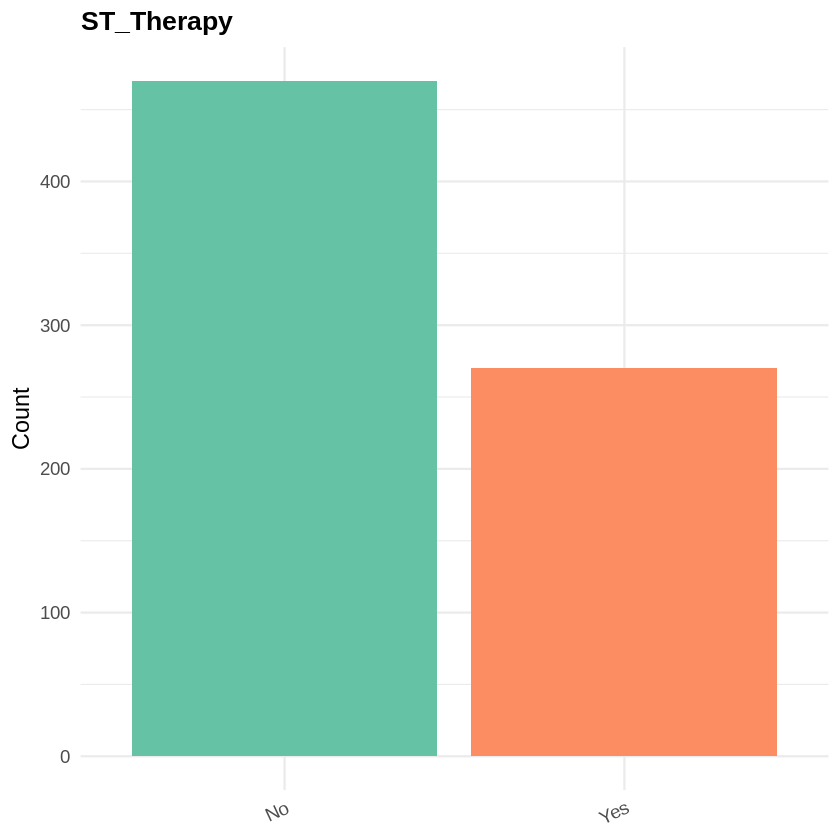

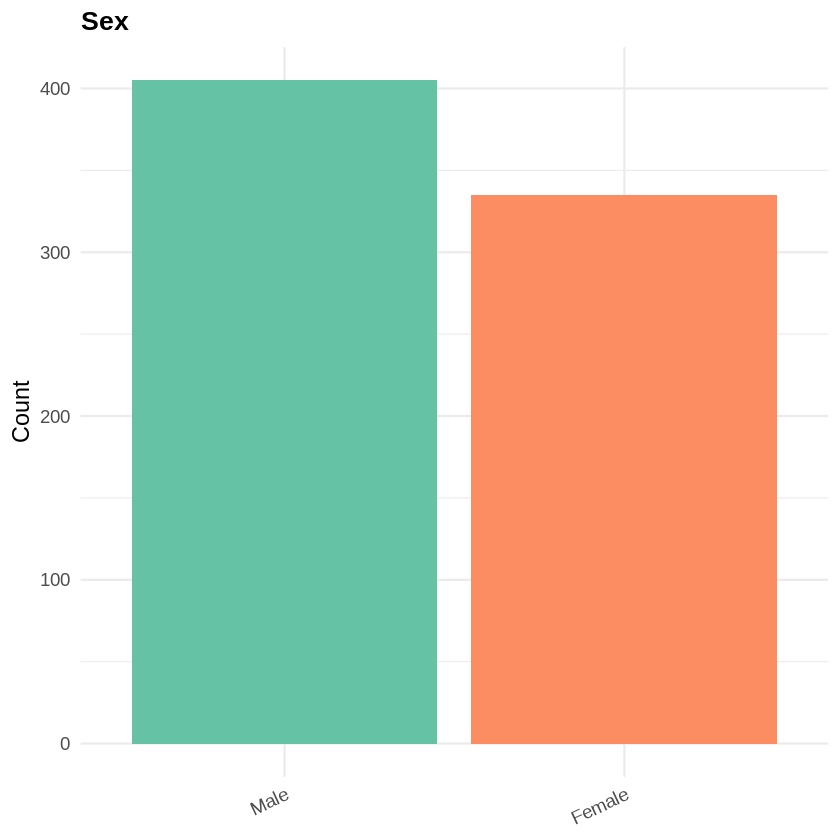

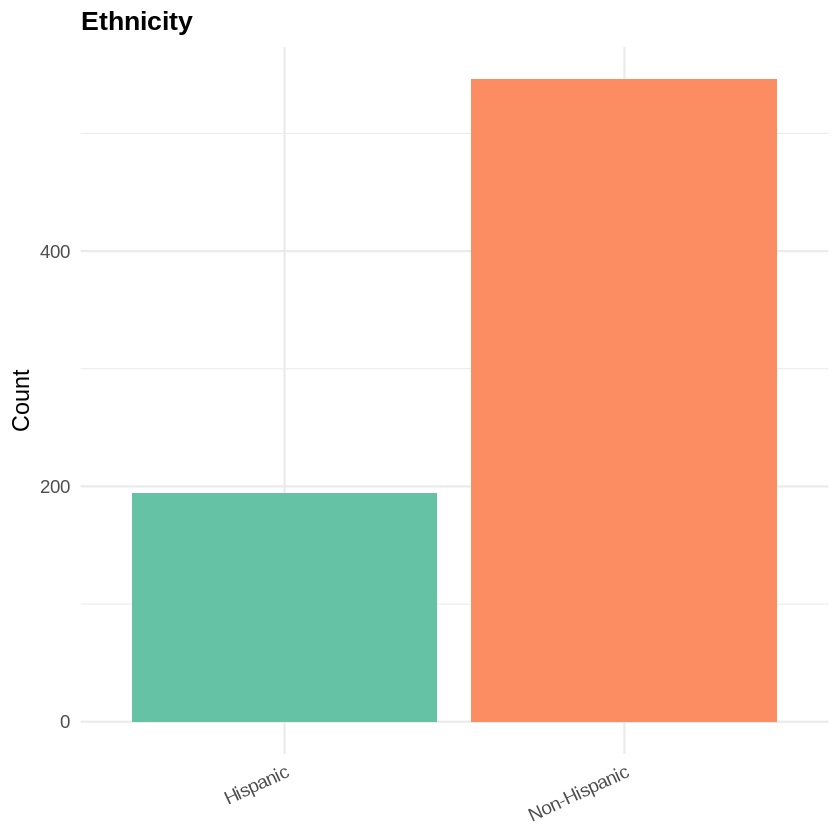

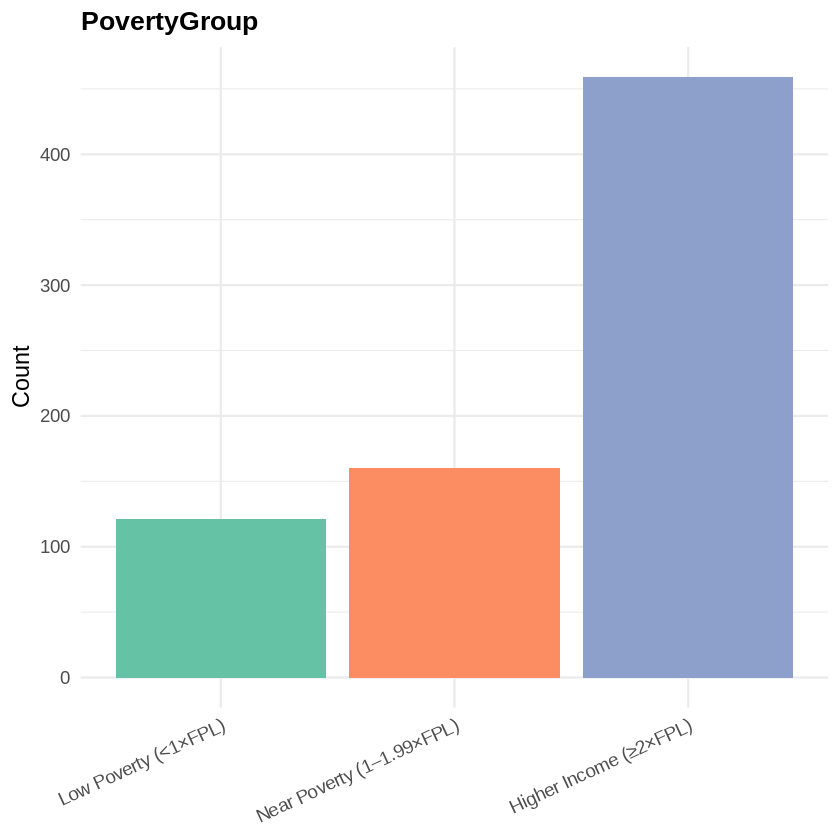

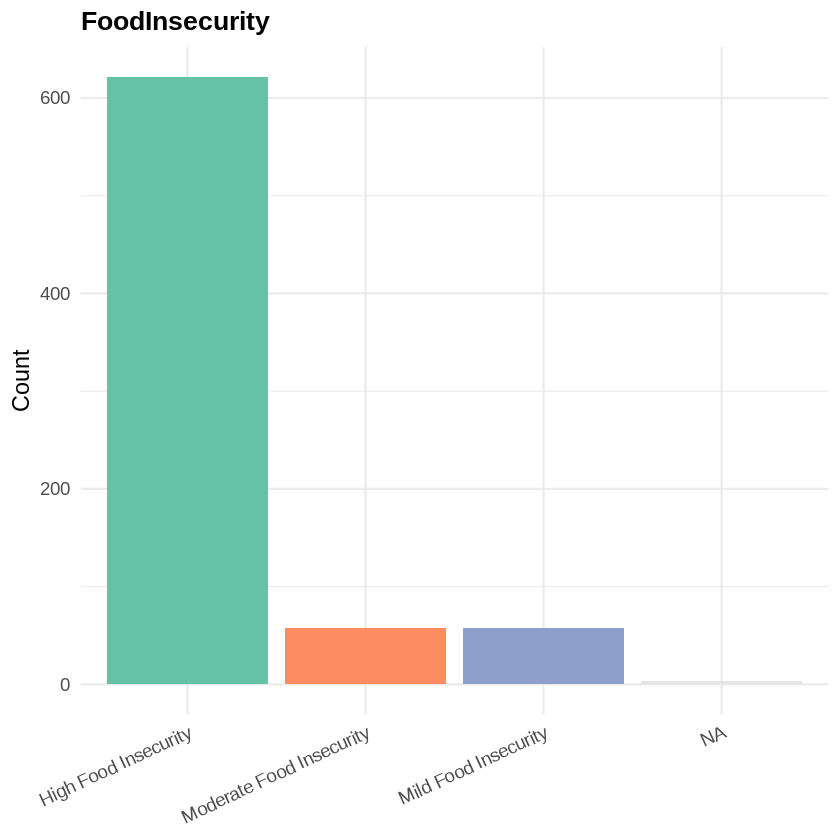

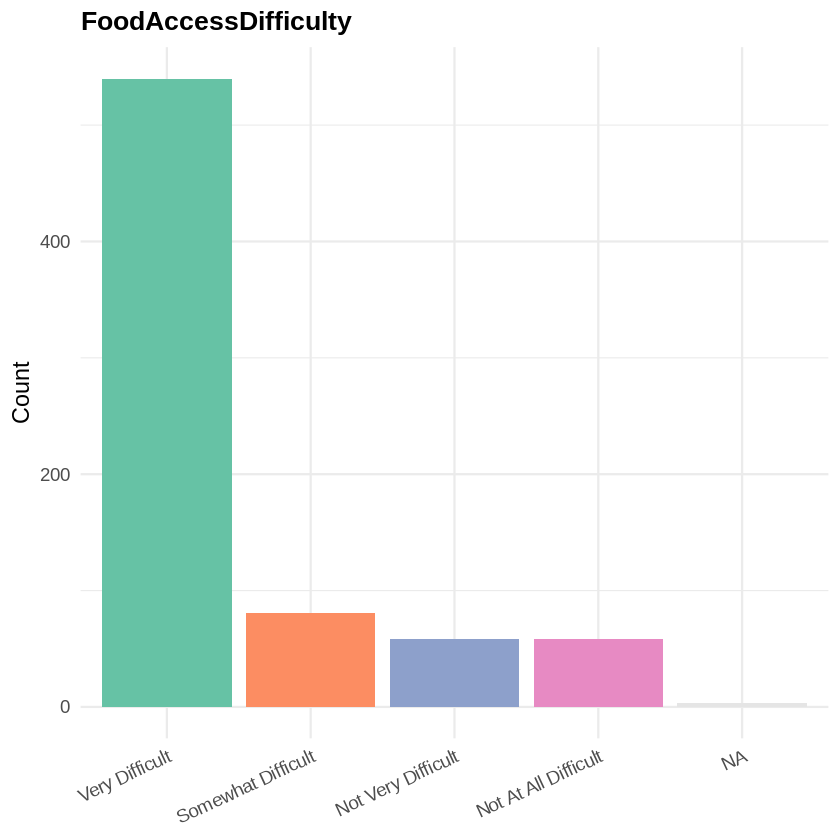

In [ ]:
library(tidyverse)
library(RColorBrewer)

# list of vars to plot
vars <- c(
  "ST_Therapy",
  "Sex",
  "Ethnicity",
  "PovertyGroup",
  "FoodInsecurity",
  "FoodAccessDifficulty"
)

# pull only Yes/No on ST_Therapy
df <- data_recoded %>%
  filter(ST_Therapy %in% c("Yes","No"))

# for each variable, make and print a ggplot
plots <- lapply(vars, function(v) {
  p <- ggplot(df, aes_string(x = v, fill = v)) +
    geom_bar() +
    scale_fill_brewer(palette = "Set2", na.value = "grey90") +
    labs(
      title = v,
      x = NULL,
      y = "Count",
      fill = NULL
    ) +
    theme_minimal(base_size = 14) +
    theme(
      axis.text.x    = element_text(angle = 25, hjust = 1),
      plot.title     = element_text(face = "bold", size = 16),
      legend.position = "none"   # hide legend since bars are self‐labeled
    )
  print(p)
  # optional: save each to disk
  # ggsave(paste0(v, "_bar.png"), plot = p, width = 6, height = 4)
})

# if you want to see them in a grid, uncomment:
# library(patchwork)
# wrap_plots(plots, ncol = 2)


In [ ]:
if (!require('survey')) install.packages('survey')  # Install if not already installed
library(survey)  # Load the survey package

Loading required package: survey

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘survey’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘numDeriv’, ‘mitools’, ‘RcppArmadillo’


Loading required package: grid

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: survival


Attaching package: ‘survey’


The following object is masked from ‘package:graphics’:

    dotchart




In [ ]:
library(survey)

# tell survey how to handle strata with only one PSU
options(survey.lonely.psu = "adjust")

nhis_design <- svydesign(
  ids       = ~PPSU,
  strata    = ~PSTRAT,
  weights   = ~WTFA_C,
  data      = df_model,
  nest      = TRUE,
  lonely.psu = "adjust"      # also set here to be explicit
)

fit_st <- svyglm(
  ST_Therapy ~ Sex + Ethnicity + FoodInsecurity + FoodAccessDifficulty + PovertyGroup,
  design = nhis_design,
  family = quasibinomial()
)

summary(fit_st)



Call:
svyglm(formula = ST_Therapy ~ Sex + Ethnicity + FoodInsecurity + 
    FoodAccessDifficulty + PovertyGroup, design = nhis_design, 
    family = quasibinomial())

Survey design:
svydesign(ids = ~PPSU, strata = ~PSTRAT, weights = ~WTFA_C, data = df_model, 
    nest = TRUE, lonely.psu = "adjust")

Coefficients: (2 not defined because of singularities)
                                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)                            -0.42054    0.30950  -1.359   0.1751  
SexFemale                              -0.36292    0.17133  -2.118   0.0349 *
EthnicityNon-Hispanic                   0.05032    0.21521   0.234   0.8153  
FoodInsecurityModerate Food Insecurity -0.32300    0.35857  -0.901   0.3683  
FoodInsecurityMild Food Insecurity      0.29822    0.32813   0.909   0.3641  
FoodAccessDifficultySomewhat Difficult  0.06309    0.31152   0.203   0.8396  
PovertyGroupNear Poverty (1–1.99×FPL)   0.05521    0.30790   0.179   0.8578  
PovertyGroupHigher 

In [ ]:
# 1) Filter to only “Yes”/“No” and drop any other/missing
df_model <- data_recoded %>%
  filter(ST_Therapy %in% c("Yes","No")) %>%
  droplevels()

# 2) Declare your survey design
library(survey)
nhis_design <- svydesign(
  ids     = ~PPSU,
  strata  = ~PSTRAT,
  weights = ~WTFA_C,
  data    = df_model,
  nest    = TRUE
)

# 3) Fit the weighted logistic regression
fit_st <- svyglm(
  ST_Therapy ~ Sex +
                Ethnicity +
                FoodInsecurity +
                FoodAccessDifficulty +
                PovertyGroup,
  design = nhis_design,
  family = quasibinomial()
)

# 4) Summarize on the logit scale
summary(fit_st)

# 5) Get odds‐ratios with 95% CIs in a neat table
library(broom)
or_table <- tidy(fit_st,
                 exponentiate = TRUE,  # exp(coef) → OR
                 conf.int     = TRUE)  # include 95% CIs
print(or_table)



Call:
svyglm(formula = ST_Therapy ~ Sex + Ethnicity + FoodInsecurity + 
    FoodAccessDifficulty + PovertyGroup, design = nhis_design, 
    family = quasibinomial())

Survey design:
svydesign(ids = ~PPSU, strata = ~PSTRAT, weights = ~WTFA_C, data = df_model, 
    nest = TRUE)

Coefficients: (2 not defined because of singularities)
                                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)                            -0.42054    0.30950  -1.359   0.1751  
SexFemale                              -0.36292    0.17133  -2.118   0.0349 *
EthnicityNon-Hispanic                   0.05032    0.21521   0.234   0.8153  
FoodInsecurityModerate Food Insecurity -0.32300    0.35857  -0.901   0.3683  
FoodInsecurityMild Food Insecurity      0.29822    0.32813   0.909   0.3641  
FoodAccessDifficultySomewhat Difficult  0.06309    0.31152   0.203   0.8396  
PovertyGroupNear Poverty (1–1.99×FPL)   0.05521    0.30790   0.179   0.8578  
PovertyGroupHigher Income (≥2×FPL)     -0.

# A tibble: 8 × 7
  term                   estimate std.error statistic p.value conf.low conf.high
  <chr>                     <dbl>     <dbl>     <dbl>   <dbl>    <dbl>     <dbl>
1 (Intercept)               0.657     0.310    -1.36   0.175     0.357     1.21 
2 SexFemale                 0.696     0.171    -2.12   0.0349    0.497     0.974
3 EthnicityNon-Hispanic     1.05      0.215     0.234  0.815     0.689     1.61 
4 FoodInsecurityModerat…    0.724     0.359    -0.901  0.368     0.358     1.47 
5 FoodInsecurityMild Fo…    1.35      0.328     0.909  0.364     0.707     2.57 
6 FoodAccessDifficultyS…    1.07      0.312     0.203  0.840     0.577     1.97 
7 PovertyGroupNear Pove…    1.06      0.308     0.179  0.858     0.577     1.94 
8 PovertyGroupHigher In…    0.906     0.280    -0.355  0.723     0.522     1.57 


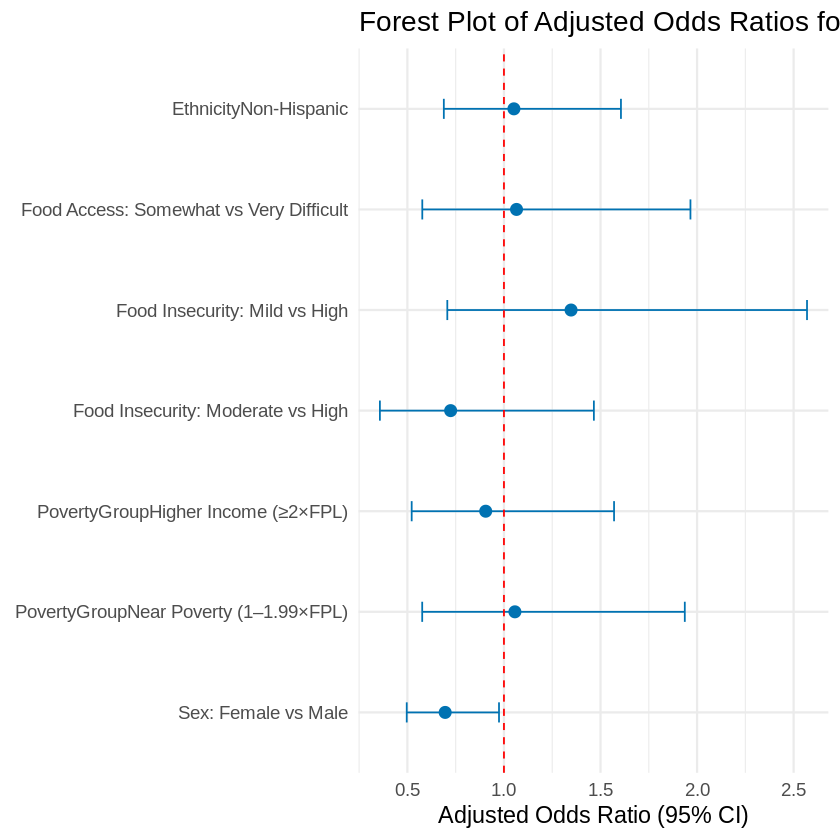

In [ ]:
# packages you’ll need
library(broom)       # for tidy()
library(dplyr)       # for filter(), mutate()
library(ggplot2)     # for plotting
library(forcats)     # for fct_rev()

# 1) extract & exponentiate the coefficients
tidy_fit <- broom::tidy(fit_st, conf.int = TRUE, exponentiate = TRUE)

# 2) drop the intercept and (optionally) relabel
plot_data <- tidy_fit %>%
  filter(term != "(Intercept)") %>%
  mutate(
    term = recode(term,
      SexFemale                            = "Sex: Female vs Male",
      EthnicityNon.Hispanic               = "Ethnicity: Non-Hispanic vs Hispanic",
      `FoodInsecurityModerate Food Insecurity` = "Food Insecurity: Moderate vs High",
      `FoodInsecurityMild Food Insecurity`     = "Food Insecurity: Mild vs High",
      `FoodAccessDifficultySomewhat Difficult` = "Food Access: Somewhat vs Very Difficult",
      `FoodAccessDifficultyNot Very Difficult` = "Food Access: Not Very vs Very Difficult",
      `FoodAccessDifficultyNot At All Difficult` = "Food Access: Not At All vs Very Difficult",
      PovertyGroupNear.Poverty             = "Poverty: Near (1–1.99×FPL) vs Low (<1×FPL)",
      PovertyGroupHigher.Income            = "Poverty: High (≥2×FPL) vs Low (<1×FPL)"
    )
  )

# 3) draw the forest plot
ggplot(plot_data, aes(x = estimate, y = fct_rev(term), xmin = conf.low, xmax = conf.high)) +
  geom_point(color = "#0072B2", size = 3) +
  geom_errorbarh(height = 0.2, color = "#0072B2") +
  geom_vline(xintercept = 1, linetype = "dashed", color = "red") +
  labs(
    x     = "Adjusted Odds Ratio (95% CI)",
    y     = NULL,
    title = "Forest Plot of Adjusted Odds Ratios for Receiving ST Therapy"
  ) +
  theme_minimal(base_size = 14)


In [ ]:
library(ggplot2)

# Assuming 'or_table' and its structure from previous code
# Define pretty_labels (replace with your desired labels)
pretty_labels <- c(
  "SexFemale" = "Sex: Female vs Male",
  "EthnicityNon.Hispanic" = "Ethnicity: Non-Hispanic vs Hispanic",
  "FoodInsecurityModerate Food Insecurity" = "Food Insecurity: Moderate vs High",
  "FoodInsecurityMild Food Insecurity" = "Food Insecurity: Mild vs High",
  "FoodAccessDifficultySomewhat Difficult" = "Food Access: Somewhat vs Very Difficult",
  "FoodAccessDifficultyNot Very Difficult" = "Food Access: Not Very vs Very Difficult",
  "FoodAccessDifficultyNot At All Difficult" = "Food Access: Not At All vs Very Difficult",
  "PovertyGroupNear.Poverty" = "Poverty: Near (1–1.99×FPL) vs Low (<1×FPL)",
  "PovertyGroupHigher.Income" = "Poverty: High (≥2×FPL) vs Low (<1×FPL)"
)

ggplot(or_table, aes(x = term, y = OR)) +
  geom_point(size = 3, colour = "#0D6EFD") +
  geom_errorbar(aes(ymin = CI_low, ymax = CI_high), width = .15, colour = "#0D6EFD") +
  geom_vline(xintercept = 1, linetype = "dashed", colour = "red") +
  coord_flip() +
  scale_x_discrete(labels = rev(pretty_labels)) +   # Use the defined pretty_labels
  labs(
    title = "Forest Plot of Adjusted Odds Ratios for Receiving ST Services",
    x = "Adjusted Odds Ratio (95% CI)",
    y = NULL
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title.position = "plot",
    plot.title = element_text(hjust = 0.5, face = "bold"),
    axis.text.y = element_text(size = 12),
    axis.text.x = element_text(size = 12)
  )


ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'OR' not found

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .    

In [ ]:
library(ggplot2)

ggplot(or_table, aes(x = term, y = OR)) +
  geom_point(size = 3, colour = "#0D6EFD") +
  geom_errorbar(aes(ymin = CI_low, ymax = CI_high), width = .15,
                colour = "#0D6EFD") +
  geom_vline(xintercept = 1, linetype = "dashed", colour = "red") +
  coord_flip() +
  scale_x_discrete(labels = rev(pretty_labels)) +   # your custom labels
  labs(
    title = "Forest Plot of Adjusted Odds Ratios for Receiving ST Services",
    x     = "Adjusted Odds Ratio (95% CI)",
    y     = NULL
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title.position = "plot",   # <— ensures title is handled globally
    plot.title          = element_text(hjust = 0.5, face = "bold"),  # centered
    axis.text.y         = element_text(size = 12),
    axis.text.x         = element_text(size = 12)
  )


ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'OR' not found

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .    

In [ ]:
if (!require("gridExtra")) install.packages("gridExtra", dependencies = TRUE)
library(gridExtra)  # Load the library


Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [ ]:
library(ggplot2)

# Assuming 'or_table' and 'pretty_labels' from previous code

ggplot(or_table, aes(x = term, y = OR)) +
  geom_point(size = 3, colour = "#0D6EFD") +
  geom_errorbar(aes(ymin = CI_low, ymax = CI_high), width = .15, colour = "#0D6EFD") +
  geom_vline(xintercept = 1, linetype = "dashed", colour = "red") +
  coord_flip() +
  scale_x_discrete(labels = rev(pretty_labels)) +   # Use custom labels
  labs(
    title = "Forest Plot of Adjusted Odds Ratios for Receiving ST Services",
    x = "Adjusted Odds Ratio (95% CI)",
    y = NULL
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title.position = "plot",
    plot.title = element_text(hjust = 0.5, face = "bold"),  # Centered title
    axis.text.y = element_text(size = 12, hjust = 0.5),  # Center y-axis labels (which are now horizontal)
    axis.text.x = element_text(size = 12),
    plot.margin = margin(1, 2, 1, 1, "cm") # Increase left margin for labels
  )

ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'OR' not found

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .    